In [2]:
import pandas as pd
from sklearn import linear_model as sk
import statsmodels.api as sm
import matplotlib.pylab
import matplotlib.pylab as plt
import numpy as np
import patsy as pts

In [3]:
df1 = pd.read_csv("C:\Users\dell pc\\bank-additional-full.csv")

In [4]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df1.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print "Missing values per column:"
print df1.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column

Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
pd.get_dummies(df1,columns=['job'])

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,married,basic.4y,no,no,no,telephone,may,mon,261,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57,married,high.school,unknown,no,no,telephone,may,mon,149,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,37,married,high.school,no,yes,no,telephone,may,mon,226,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,40,married,basic.6y,no,no,no,telephone,may,mon,151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56,married,high.school,no,no,yes,telephone,may,mon,307,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,45,married,basic.9y,unknown,no,no,telephone,may,mon,198,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,59,married,professional.course,no,no,no,telephone,may,mon,139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,41,married,unknown,unknown,no,no,telephone,may,mon,217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,24,single,professional.course,no,yes,no,telephone,may,mon,380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,25,single,high.school,no,yes,no,telephone,may,mon,50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
df1 = pd.get_dummies(df1,columns=['job'])

In [9]:
df1 = pd.get_dummies(df1,columns=['marital'])

In [10]:
loan_catg=['no','yes','unknown']

In [11]:
df1.loan.astype("category",
  ordered=True,
  categories=loan_catg
).cat.codes

0        0
1        0
2        0
3        0
4        1
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       1
13       0
14       0
15       1
16       0
17       1
18       1
19       0
20       0
21       0
22       0
23       0
24       0
25       1
26       0
27       0
28       0
29       2
        ..
41158    0
41159    0
41160    0
41161    0
41162    0
41163    0
41164    0
41165    0
41166    0
41167    0
41168    0
41169    0
41170    0
41171    0
41172    0
41173    0
41174    0
41175    0
41176    1
41177    0
41178    0
41179    0
41180    0
41181    0
41182    0
41183    0
41184    0
41185    0
41186    0
41187    0
dtype: int8

In [12]:
df1.loan = df1.loan.astype("category",
  ordered=True,
  categories=loan_catg
).cat.codes

In [13]:
df1.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,56,basic.4y,no,no,0,telephone,may,mon,261,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,high.school,unknown,no,0,telephone,may,mon,149,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,high.school,no,yes,0,telephone,may,mon,226,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,basic.6y,no,no,0,telephone,may,mon,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,high.school,no,no,1,telephone,may,mon,307,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
housing_catg = ['no','yes','unknown']

In [15]:
df1['housing'] = df1.housing.astype("category",
  ordered=True,
  categories=housing_catg
).cat.codes

In [16]:
df1.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,56,basic.4y,no,0,0,telephone,may,mon,261,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,high.school,unknown,0,0,telephone,may,mon,149,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,high.school,no,1,0,telephone,may,mon,226,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,basic.6y,no,0,0,telephone,may,mon,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,high.school,no,0,1,telephone,may,mon,307,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
default_catg = ['no','yes','unknown']

In [18]:
df1['default'] = df1.default.astype("category",
  ordered=True,
  categories=default_catg
).cat.codes

In [19]:
df1.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,56,basic.4y,0,0,0,telephone,may,mon,261,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,high.school,2,0,0,telephone,may,mon,149,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,high.school,0,1,0,telephone,may,mon,226,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,basic.6y,0,0,0,telephone,may,mon,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,high.school,0,0,1,telephone,may,mon,307,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
df1['contact'] = df1.contact.astype("category").cat.codes

In [21]:
df1.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,56,basic.4y,0,0,0,1,may,mon,261,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,high.school,2,0,0,1,may,mon,149,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,high.school,0,1,0,1,may,mon,226,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,basic.6y,0,0,0,1,may,mon,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,high.school,0,0,1,1,may,mon,307,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
poutcome_catg = ['failure','success','nonexistent']

In [23]:
df1['poutcome'] = df1.poutcome.astype("category",
  ordered=True,
  categories=poutcome_catg
).cat.codes

In [24]:
df1.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,56,basic.4y,0,0,0,1,may,mon,261,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,high.school,2,0,0,1,may,mon,149,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,high.school,0,1,0,1,may,mon,226,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,basic.6y,0,0,0,1,may,mon,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,high.school,0,0,1,1,may,mon,307,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
month = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

In [26]:
df1['month'] = df1.month.astype("category",
  ordered=True,
  categories=month
).cat.codes

In [27]:
day_of_week = ['mon','tue','wed','thu','fri']

In [28]:
df1['day_of_week']= df1.day_of_week.astype("category",
  ordered=True,
  categories=day_of_week
).cat.codes

In [29]:
df1.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,56,basic.4y,0,0,0,1,4,0,261,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,high.school,2,0,0,1,4,0,149,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,high.school,0,1,0,1,4,0,226,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,basic.6y,0,0,0,1,4,0,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,high.school,0,0,1,1,4,0,307,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
df1 = pd.get_dummies(df1,columns=['education'])

In [31]:
df1.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,0,0,0,1,4,0,261,1,999,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57,2,0,0,1,4,0,149,1,999,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,37,0,1,0,1,4,0,226,1,999,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,40,0,0,0,1,4,0,151,1,999,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56,0,0,1,1,4,0,307,1,999,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
response = ['no','yes']
df1['y'] = df1.y.astype("category",
  ordered=True,
  categories=response
).cat.codes

In [33]:
df1['y']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41158    1
41159    1
41160    1
41161    0
41162    0
41163    1
41164    1
41165    1
41166    1
41167    0
41168    0
41169    0
41170    0
41171    1
41172    1
41173    1
41174    1
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, dtype: int8

In [34]:
%matplotlib inline

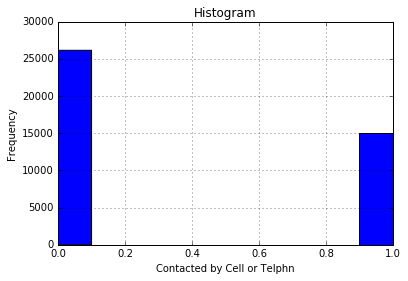

In [38]:
df1.contact.hist()
plt.title("Histogram")
plt.xlabel("Contacted by Cell or Telphn")
plt.ylabel("Frequency")

In [52]:
pd.crosstab(df1['contact'],df1['y'])

y,0,1
contact,,
0,22291,3853
1,14257,787


In [54]:
pd.crosstab(df1['day_of_week'],df1['y'])

y,0,1
day_of_week,,
0,7667,847
1,7137,953
2,7185,949
3,7578,1045
4,6981,846


In [56]:
pd.crosstab(df1['default'],df1['y'])

y,0,1
default,,
0,28391,4197
1,3,0
2,8154,443


In [57]:
pd.crosstab(df1['loan'],df1['y'])

y,0,1
loan,,
0,30100,3850
1,5565,683
2,883,107


In [58]:
pd.crosstab(df1['housing'],df1['y'])

y,0,1
housing,,
0,16596,2026
1,19069,2507
2,883,107


In [59]:
pd.crosstab(df1['month'],df1['y'])

y,0,1
month,,
2,270,276
3,2093,539
4,12883,886
5,4759,559
6,6525,649
7,5523,655
8,314,256
9,403,315
10,3685,416


In [60]:
pd.crosstab(df1['poutcome'],df1['y'])

y,0,1
poutcome,,
0,3647,605
1,479,894
2,32422,3141


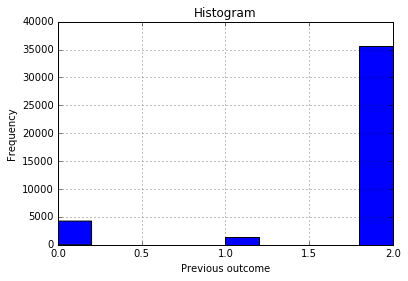

In [61]:
df1.poutcome.hist()
plt.title("Histogram")
plt.xlabel("Previous outcome")
plt.ylabel("Frequency")

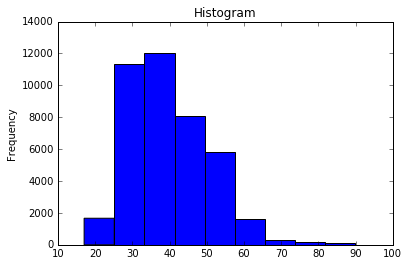

In [66]:
df1.age.plot.hist(title='Histogram',bins=10)
plt.show()

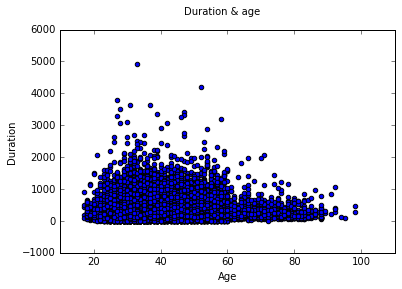

In [83]:
df1.plot.scatter(x='age',y='duration')
plt.suptitle("Duration & age")
plt.xlabel("Age")
plt.ylabel("Duration")

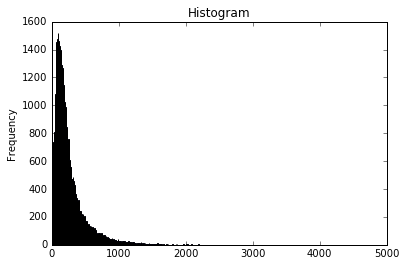

In [79]:
df1.duration.plot.hist(title='Histogram',bins=500)
plt.show()

In [35]:
age_bins = [0, 25, 45, 65, 100]
age_labels = ["0", "1", "2", "4"]
df1['age_cat'] = pd.cut(df1['age'], age_bins, labels=age_labels, 
    right=True, include_lowest=True)

In [36]:
df1.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,age_cat
0,56,0,0,0,1,4,0,261,1,999,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,57,2,0,0,1,4,0,149,1,999,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
2,37,0,1,0,1,4,0,226,1,999,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,40,0,0,0,1,4,0,151,1,999,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,56,0,0,1,1,4,0,307,1,999,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2


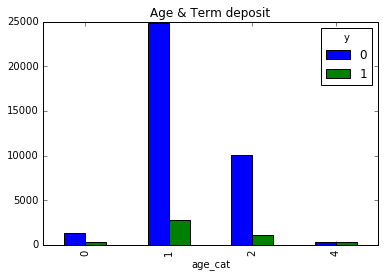

In [82]:
pd.crosstab(df1.age_cat,df1.y).plot(kind='bar')
plt.title("Age & Term deposit")

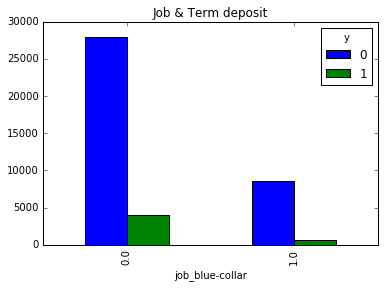

In [64]:
pd.crosstab(df1['job_blue-collar'],df1['y']).plot(kind='bar')
plt.title("Job & Term deposit")

In [37]:
y1,X1 = pts.dmatrices('y ~ duration', df1, return_type="dataframe")
print X1.columns


Index([u'Intercept', u'duration'], dtype='object')


In [38]:
y1 = np.ravel(y1)

In [39]:
model = sk.LogisticRegression()
model = model.fit(X1,y1)
model.score(X1,y1)

0.89305137418665625

In [40]:
y1.mean()

0.11265417111780131

In [41]:
pd.DataFrame(zip(X1.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-1.64242170432]
1,duration,[0.00364269039194]


In [42]:
y2,X2 = pts.dmatrices('y ~ age + duration ', df1, return_type="dataframe")
print X2.columns

Index([u'Intercept', u'age', u'duration'], dtype='object')


In [43]:
y2 = np.ravel(y2)

In [44]:
model = sk.LogisticRegression()
model = model.fit(X2,y2)
model.score(X2,y2)

0.89331844226473733

In [45]:
pd.DataFrame(zip(X2.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-1.82204358373]
1,age,[0.00904505161375]
2,duration,[0.00363573122679]


In [46]:
y,X = pts.dmatrices('y ~ age + contact + duration + default', df1, return_type="dataframe")
print X.columns




Index([u'Intercept', u'age', u'contact', u'duration', u'default'], dtype='object')


In [47]:
y = np.ravel(y)

In [48]:
model = sk.LogisticRegression()
model = model.fit(X,y)
model.score(X,y)

0.89445955132562882

In [49]:
y.mean()

0.11265417111780131

In [50]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-1.75599940162]
1,age,[0.0156633740093]
2,contact,[-1.23693354874]
3,duration,[0.00386303890294]
4,default,[-0.55501885558]


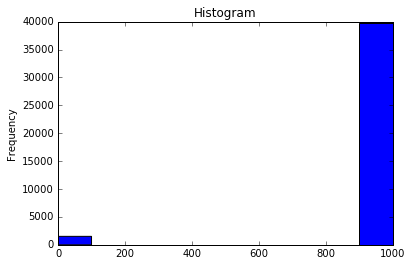

In [80]:
df1.pdays.plot.hist(title='Histogram',bins=10)
plt.show()

In [51]:
df1['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [52]:
pd.crosstab(df1['pdays'],df1['y'])

y,0,1
pdays,,
0,5,10
1,18,8
2,24,37
3,141,298
4,55,63
5,17,29
6,123,289
7,20,40
8,6,12


In [53]:
y3,X3 = pts.dmatrices('y ~ age + duration + pdays', df1, return_type="dataframe")
print X3.columns
y3=np.ravel(y3)



Index([u'Intercept', u'age', u'duration', u'pdays'], dtype='object')


In [54]:
model = sk.LogisticRegression()
model = model.fit(X3,y3)
model.score(X3,y3)

0.90252015150043707

In [55]:
pd.DataFrame(zip(X3.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-0.00263219054499]
1,age,[-0.00378521070915]
2,duration,[0.00377278859593]
3,pdays,[-0.00344621270766]


In [56]:
y4,X4 = pts.dmatrices('y ~ age + pdays', df1, return_type="dataframe")
print X4.columns
y4=np.ravel(y4)
model = sk.LogisticRegression()
model = model.fit(X4,y4)
model.score(X4,y4)
pd.DataFrame(zip(X4.columns, np.transpose(model.coef_)))



Index([u'Intercept', u'age', u'pdays'], dtype='object')


,0,1
0,Intercept,[0.0250327171007]
1,age,[0.00997417803692]
2,pdays,[-0.00273799124735]


In [57]:
model.score(X4,y4)

0.89751869476546564

In [91]:
pd.crosstab(df1['campaign'],df1['y'])

y,0,1
campaign,,
1,15342,2300
2,9359,1211
3,4767,574
4,2402,249
5,1479,120
6,904,75
7,591,38
8,383,17
9,266,17


In [92]:
pd.crosstab(df1['contact'],df1['y'])

y,0,1
contact,,
0,22291,3853
1,14257,787


In [93]:
pd.crosstab(df1['previous'],df1['y'])

y,0,1
previous,,
0,32422,3141
1,3594,967
2,404,350
3,88,128
4,32,38
5,5,13
6,2,3
7,1,0


In [58]:
y5,X5 = pts.dmatrices('y ~ age + pdays + duration + previous', df1, return_type="dataframe")
print X5.columns
y5=np.ravel(y5)
model = sk.LogisticRegression()
model = model.fit(X5,y5)

pd.DataFrame(zip(X5.columns, np.transpose(model.coef_)))


Index([u'Intercept', u'age', u'pdays', u'duration', u'previous'], dtype='object')


,0,1
0,Intercept,[-0.524525072411]
1,age,[0.00348096883339]
2,pdays,[-0.00276337487222]
3,duration,[0.00384616165694]
4,previous,[0.319651893994]


In [60]:
model.score(X5,y5)

0.90502087986792268

In [83]:
train_cols = df1.columns[0:10]

In [84]:
logit1 = sm.Logit(df1['y'].astype(float), df1[train_cols].astype(float))

In [66]:
df1['intercept'] = 1.0

In [73]:
df1['y']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41158    1
41159    1
41160    1
41161    0
41162    0
41163    1
41164    1
41165    1
41166    1
41167    0
41168    0
41169    0
41170    0
41171    1
41172    1
41173    1
41174    1
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, dtype: int8

In [71]:
df1.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,age_cat,intercept
0,56,0,0,0,1,4,0,261,1,999,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0
1,57,2,0,0,1,4,0,149,1,999,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1.0
2,37,0,1,0,1,4,0,226,1,999,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0
3,40,0,0,0,1,4,0,151,1,999,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
4,56,0,0,1,1,4,0,307,1,999,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1.0


In [85]:
result1 = logit1.fit()

Optimization terminated successfully.
         Current function value: 0.247964
         Iterations 8


In [87]:
print result1.summary2()

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.296     
Dependent Variable: y                AIC:              20446.2766
Date:               2016-07-28 14:04 BIC:              20532.5356
No. Observations:   41188            Log-Likelihood:   -10213.   
Df Model:           9                LL-Null:          -14499.   
Df Residuals:       41178            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
age           0.0082    0.0014    5.9884  0.0000   0.0055   0.0109
default      -0.4635    0.0303  -15.2981  0.0000  -0.5229  -0.4041
housing       0.0036    0.0358    0.1000  0.9204  -0.0665   0.0736
loan         -0.0754    0.0439

In [162]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41149
Method:                           MLE   Df Model:                           38
Date:                Sat, 16 Jul 2016   Pseudo R-squ.:                  0.3920
Time:                        10:45:39   Log-Likelihood:                -8815.2
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
age                               0.0026      0.002      1.080      0.280        -0.002     0.007
default                          -0.1896      0.033     -5.721      0.000 

In [163]:
print result.summary2()

                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.392     
Dependent Variable:        y                     AIC:                   17708.3563
Date:                      2016-07-16 11:34      BIC:                   18044.7665
No. Observations:          41188                 Log-Likelihood:        -8815.2   
Df Model:                  38                    LL-Null:               -14499.   
Df Residuals:              41149                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            9.0000                                                 
----------------------------------------------------------------------------------
                               Coef.   Std.Err.    z     P>|z|    [0.025   0.975] 
----------------------------------------------------------------------------------
age                             0.0026

In [91]:
list(df1.columns.values)

['age',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'age_cat',
 'intercept']

In [92]:
df1['y1'] = df1['y']

In [93]:
list(df1.columns.values)

['age',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'age_cat',
 'intercept',
 'y1']

In [94]:
del df1['y']

In [95]:
df1.rename(columns={'y1': 'y'}, inplace=True)

In [96]:
list(df1.columns.values)

['age',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'age_cat',
 'intercept',
 'y']

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 44 columns):
age                              41188 non-null int64
default                          41188 non-null int8
housing                          41188 non-null int8
loan                             41188 non-null int8
contact                          41188 non-null int8
month                            41188 non-null int8
day_of_week                      41188 non-null int8
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
poutcome                         41188 non-null int8
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed               

In [98]:
del df1['age_cat']

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 43 columns):
age                              41188 non-null int64
default                          41188 non-null int8
housing                          41188 non-null int8
loan                             41188 non-null int8
contact                          41188 non-null int8
month                            41188 non-null int8
day_of_week                      41188 non-null int8
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
poutcome                         41188 non-null int8
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed               

In [156]:
df1 = df1[['age',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 
 'marital_married',
 'marital_single',
 'marital_unknown',
 
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'intercept',
 'y',
  'education_basic.4y', 'marital_divorced',  'job_admin.'    ]]

In [157]:
df1.columns.tolist()

['age',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'intercept',
 'y',
 'education_basic.4y',
 'marital_divorced',
 'job_admin.']

In [100]:
y6,X6 = pts.dmatrices('y ~ age + duration + pdays + previous + poutcome + campaign', df1, return_type="dataframe")
y6 = np.ravel(y6)
logit1 = sm.Logit(y6, X6)
result1 = logit1.fit()
print result1.summary2()

Optimization terminated successfully.
         Current function value: 0.257464
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.269     
Dependent Variable: y                AIC:              21222.8164
Date:               2016-07-28 14:14 BIC:              21283.1977
No. Observations:   41188            Log-Likelihood:   -10604.   
Df Model:           6                LL-Null:          -14499.   
Df Residuals:       41181            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.9672    0.1556   -6.2167  0.0000  -1.2721  -0.6623
age           0.0078    0.0017    4.7071  0.0000   0.0046   0.

In [101]:
y5,X5 = pts.dmatrices('y ~ age + pdays', df1, return_type="dataframe")
print X5.columns
y5=np.ravel(y5)
logit2 = sm.Logit(y5, X5)
result2 = logit2.fit()
print result2.summary2()


Index([u'Intercept', u'age', u'pdays'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.320997
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.088     
Dependent Variable: y                AIC:              26448.4436
Date:               2016-07-28 14:14 BIC:              26474.3214
No. Observations:   41188            Log-Likelihood:   -13221.   
Df Model:           2                LL-Null:          -14499.   
Df Residuals:       41185            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     0.3341    0.0826    4.0444  0.0001   0.1722   0.4961
age   

In [102]:
y6,X6 = pts.dmatrices('y ~ age + duration + pdays + previous + poutcome + campaign', df1, return_type="dataframe")
y6 = np.ravel(y6)
logit1 = sm.Logit(y6, X6)
result1 = logit1.fit()
print result1.summary2()

Optimization terminated successfully.
         Current function value: 0.257464
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.269     
Dependent Variable: y                AIC:              21222.8164
Date:               2016-07-28 14:14 BIC:              21283.1977
No. Observations:   41188            Log-Likelihood:   -10604.   
Df Model:           6                LL-Null:          -14499.   
Df Residuals:       41181            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.9672    0.1556   -6.2167  0.0000  -1.2721  -0.6623
age           0.0078    0.0017    4.7071  0.0000   0.0046   0.

In [109]:
from sklearn.decomposition import PCA

cols = [col for col in df1.columns if col not in ['y']]
frame = df1[cols]
npa = frame.values
npa
pca = PCA(n_components=5)
pca.fit(npa)

PCA(copy=True, n_components=5, whiten=False)

In [169]:

cols1 = [col for col in df1.columns if col not in [['y'],['education_basic.4y'],
 ['marital_divorced'],
 ['job_admin.']]]
frames = df1[cols1]

pca6 = PCA(n_components=20)



PCA(copy=True, n_components=20, whiten=False)

In [174]:
del frames['marital_divorced']

In [175]:
del frames['job_admin.']

In [176]:
del frames['education_basic.4y']

In [178]:
X_frames = StandardScaler().fit_transform(frames)
pca6 = PCA(n_components=20)
Y_sklearn6 = pca6.fit_transform(X_frames)
logit6 = sm.Logit(y_new, Y_sklearn6)
result6 = logit6.fit()
print result6.summary2()

Optimization terminated successfully.
         Current function value: 0.636072
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.807    
Dependent Variable: y                AIC:              52437.1015
Date:               2016-07-28 17:04 BIC:              52609.6196
No. Observations:   41188            Log-Likelihood:   -26199.   
Df Model:           19               LL-Null:          -14499.   
Df Residuals:       41168            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        0.2305     0.0053    43.3252   0.0000    0.2201    0.2410
x2       -0.0319     0.0069    -4.6014   0.0000   -0.0455 

In [110]:
print pca.explained_variance_ratio_


[  6.26887594e-01   3.30886098e-01   4.08529183e-02   1.01384533e-03
   1.93107852e-04]


In [111]:
pca.components_

array([[  4.25815387e-05,  -5.28135991e-05,  -1.73389451e-05,
         -5.73022397e-06,  -6.35444870e-05,  -1.23493959e-04,
          5.51691338e-05,   9.97084283e-01,  -7.99845830e-04,
         -7.37952645e-02,   1.03829308e-04,  -3.96954736e-05,
         -2.85260439e-04,  -3.84271770e-06,  -6.82721294e-05,
         -3.58297839e-04,  -1.93983558e-02,  -1.23983993e-05,
          1.46604355e-05,   1.78380808e-06,  -3.01984114e-06,
         -1.29357219e-06,   1.30182524e-05,   2.41843935e-06,
         -1.81138975e-06,   1.13200496e-05,  -2.02525074e-05,
         -2.41462777e-06,  -2.01064746e-06,  -8.32345595e-06,
         -1.15769424e-05,   1.82770561e-05,   1.62334230e-06,
          9.36368126e-06,   3.83209262e-06,   3.62896032e-06,
          8.54977955e-06,   1.27863558e-07,  -1.07047309e-05,
         -1.83441410e-05,   3.54649453e-06,   0.00000000e+00],
       [ -1.92296813e-03,   3.81558166e-04,  -3.46507620e-05,
          2.62368941e-06,   3.28916950e-04,  -7.72839619e-04,
       

In [112]:
print pca.explained_variance_

[  6.74110834e+04   3.55811642e+04   4.39303554e+03   1.09021798e+02
   2.07654604e+01]


In [113]:
pca1 = PCA()

In [116]:
y_new = df1['y']

In [117]:
X = df1

In [123]:
X.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,intercept
0,56,0,0,0,1,4,0,261,1,999,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,57,2,0,0,1,4,0,149,1,999,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,37,0,1,0,1,4,0,226,1,999,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,40,0,0,0,1,4,0,151,1,999,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,56,0,0,1,1,4,0,307,1,999,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [119]:
del X['y']

In [121]:
from sklearn.preprocessing import scale

X_reduced = pca1.fit_transform(scale(X))

In [124]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [122]:
np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

array([ 11.4 ,  17.71,  22.82,  27.16,  31.26,  35.06,  38.62,  41.78,
        44.91,  47.99,  50.9 ,  53.7 ,  56.45,  59.11,  61.68,  64.23,
        66.76,  69.28,  71.72,  74.15,  76.56,  78.92,  81.18,  83.33,
        85.38,  87.4 ,  89.36,  91.11,  92.83,  94.5 ,  95.98,  97.05,
        98.05,  99.03,  99.67,  99.91,  99.96,  99.98,  99.98,  99.98,
        99.98,  99.98])

In [125]:
sklearn_pca = PCA(n_components=42)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [130]:
variance_exp = np.cumsum(np.round(sklearn_pca.explained_variance_ratio_, decimals=4)*100)

In [131]:
variance_exp

array([ 11.4 ,  17.71,  22.82,  27.16,  31.26,  35.06,  38.62,  41.78,
        44.91,  47.99,  50.9 ,  53.7 ,  56.45,  59.11,  61.68,  64.23,
        66.76,  69.28,  71.72,  74.15,  76.56,  78.92,  81.18,  83.33,
        85.38,  87.4 ,  89.36,  91.11,  92.83,  94.5 ,  95.98,  97.05,
        98.05,  99.03,  99.67,  99.91,  99.96,  99.98,  99.98,  99.98,
        99.98,  99.98])

In [139]:
for i, j in zip(df1.columns, np.transpose(variance_exp)):
    print i,j

age 11.4
default 17.71
housing 22.82
loan 27.16
contact 31.26
month 35.06
day_of_week 38.62
duration 41.78
campaign 44.91
pdays 47.99
previous 50.9
poutcome 53.7
emp.var.rate 56.45
cons.price.idx 59.11
cons.conf.idx 61.68
euribor3m 64.23
nr.employed 66.76
job_admin. 69.28
job_blue-collar 71.72
job_entrepreneur 74.15
job_housemaid 76.56
job_management 78.92
job_retired 81.18
job_self-employed 83.33
job_services 85.38
job_student 87.4
job_technician 89.36
job_unemployed 91.11
job_unknown 92.83
marital_divorced 94.5
marital_married 95.98
marital_single 97.05
marital_unknown 98.05
education_basic.4y 99.03
education_basic.6y 99.67
education_basic.9y 99.91
education_high.school 99.96
education_illiterate 99.98
education_professional.course 99.98
education_university.degree 99.98
education_unknown 99.98
intercept 99.98


In [145]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ -2.67778409e-02  -3.49956689e-01  -3.22387721e-01 ...,  -5.88057539e-16
    3.39576357e-16   0.00000000e+00]
 [ -1.33092645e-01  -1.97936931e-01   7.65674068e-02 ...,  -1.38054822e-16
   -7.32862218e-17   0.00000000e+00]
 [  3.42643328e-02   6.28803990e-03  -9.85850570e-03 ...,   2.25457853e-16
   -1.76477135e-16   0.00000000e+00]
 ..., 
 [  5.84845198e-02   2.63696634e-01  -3.50740259e-01 ...,   1.39005702e-02
    2.05863789e-02   0.00000000e+00]
 [  5.35806533e-04  -4.75976808e-02   1.74166967e-02 ...,   6.11342903e-03
    9.05382765e-03   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]

Eigenvalues 
[  4.67224419e+00   2.58676991e+00   2.09530347e+00   1.78111067e+00
   1.68098669e+00   9.93268755e-02   1.96846478e-02   7.83082949e-03
   1.55628651e+00   2.61777023e-01   1.46079944e+00   4.40514588e-01
   4.03383778e-01   4.09973305e-01   6.08754456e-01   1.29735005e+00
   1.28284654e+0

In [146]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.67224419208
2.58676990587
2.09530346816
1.78111066691
1.68098669064
1.55628650742
1.46079944448
1.29735005455
1.28284653815
1.26290731603
1.19207402935
1.14848995182
1.12883546506
1.09019203394
1.05358009742
1.04607334805
1.03889127134
1.03330182762
1.00084599625
0.994949798734
0.988138211277
0.96850292813
0.926602473211
0.883248787445
0.839665586744
0.829216859383
0.801674244623
0.716831839484
0.706003553806
0.686026869327
0.608754455531
0.440514587908
0.40997330549
0.403383777952
0.261777022754
0.0993268754827
0.019684647835
0.00783082948713
2.44036918484e-15
1.98341731069e-15
5.94198166194e-16
0.0


In [147]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

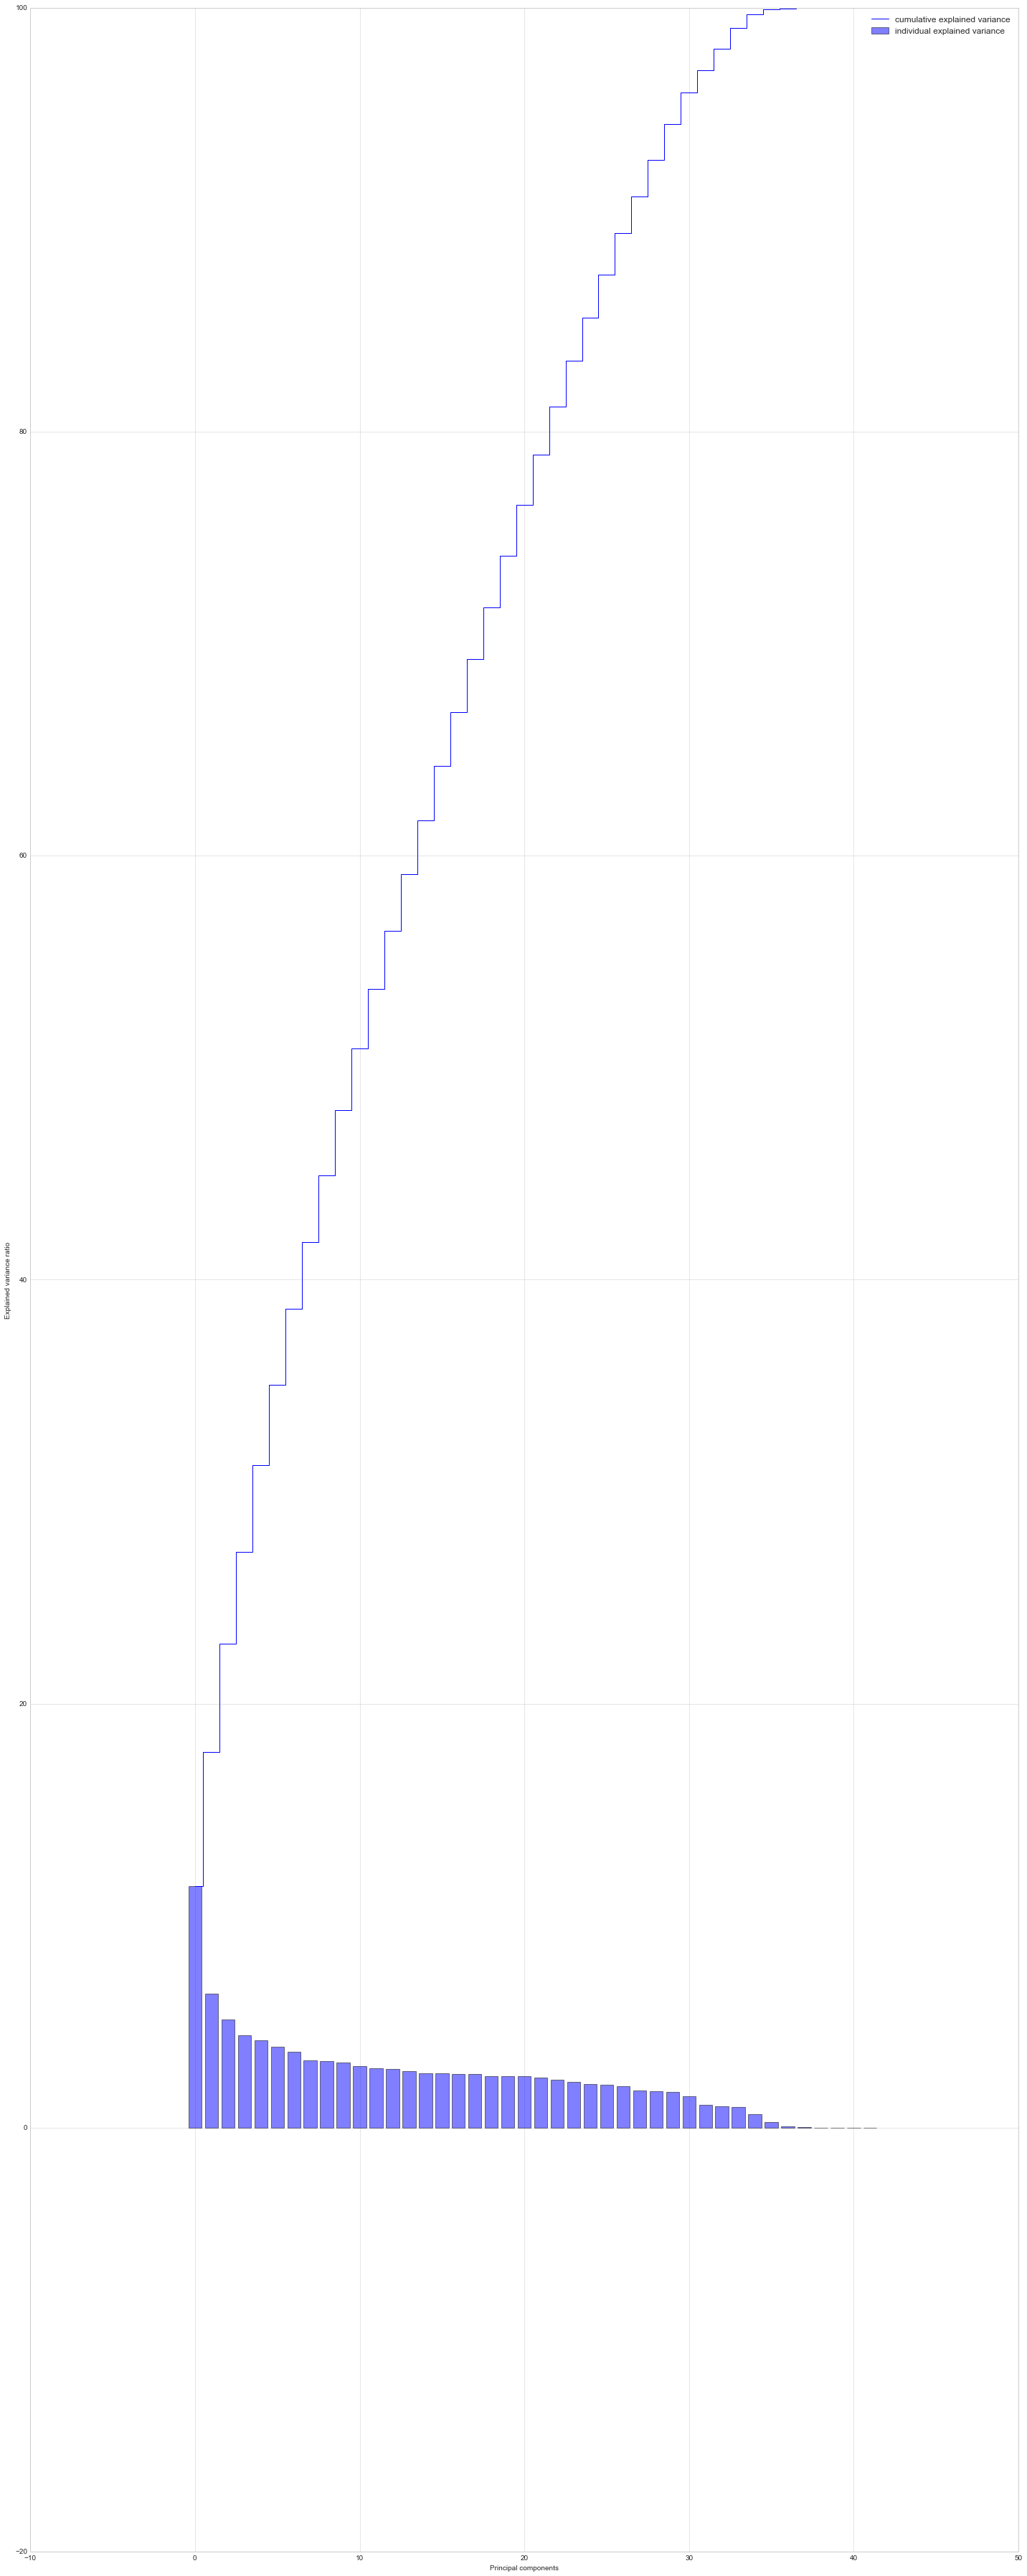

In [156]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 50))

    plt.bar(range(len(eig_pairs)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(eig_pairs)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [157]:

sklearn_pca2 = PCA(n_components=8)
Y_sklearn2 = sklearn_pca2.fit_transform(X_std)

In [158]:
Y_sklearn2

array([[-2.03472584, -2.46210186,  0.99841173, ...,  1.01509869,
         1.52169496, -0.5273564 ],
       [-2.06319664, -1.03389792, -0.58834465, ..., -1.05092654,
        -1.03466576, -1.01743439],
       [-1.61507481,  0.13171215, -1.00747431, ..., -1.39054694,
        -1.51122919,  0.06549129],
       ..., 
       [ 1.86476343, -1.72730122,  2.29215396, ..., -0.73708748,
         1.50682847, -0.40414571],
       [ 1.46984351, -0.4608496 ,  0.82426905, ..., -1.22239885,
        -0.6510395 , -1.37668374],
       [ 3.19952959, -3.27052175,  2.50301257, ...,  0.32719406,
         0.61966849, -0.03217195]])

In [159]:

logit3 = sm.Logit(y_new, Y_sklearn2)



In [162]:
result3 = logit3.fit()
print result3.summary2()

Optimization terminated successfully.
         Current function value: 0.664875
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.889    
Dependent Variable: y                AIC:              54785.7556
Date:               2016-07-28 16:30 BIC:              54854.7628
No. Observations:   41188            Log-Likelihood:   -27385.   
Df Model:           7                LL-Null:          -14499.   
Df Residuals:       41180            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.2144      0.0051    41.8477    0.0000     0.2044     0.2245
x2    -0.0286      0.0064    -4.4978    0.0000    -0.0

In [163]:
sklearn_pca3 = PCA(n_components=20)
Y_sklearn3 = sklearn_pca3.fit_transform(X_std)
logit5 = sm.Logit(y_new, Y_sklearn3)
result5 = logit5.fit()
print result5.summary2()

Optimization terminated successfully.
         Current function value: 0.638282
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.813    
Dependent Variable: y                AIC:              52619.1146
Date:               2016-07-28 16:32 BIC:              52791.6326
No. Observations:   41188            Log-Likelihood:   -26290.   
Df Model:           19               LL-Null:          -14499.   
Df Residuals:       41168            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        0.2308     0.0053    43.2803   0.0000    0.2203    0.2412
x2       -0.0324     0.0066    -4.9449   0.0000   -0.0453 

In [233]:
from scipy.stats.stats import pearsonr
pearsonr(v1,y_new)

(0.030398803040003714, 6.8021364185283562e-10)

In [234]:
pearsonr(v2,y_new)

(0.030398803040003721, 6.8021364185283562e-10)

In [209]:
v1

0        56
1        57
2        37
3        40
4        56
5        45
6        59
7        41
8        24
9        25
10       41
11       25
12       29
13       57
14       35
15       54
16       35
17       46
18       50
19       39
20       30
21       55
22       55
23       41
24       37
25       35
26       59
27       39
28       54
29       55
         ..
41158    35
41159    35
41160    33
41161    33
41162    60
41163    35
41164    54
41165    38
41166    32
41167    32
41168    38
41169    62
41170    40
41171    33
41172    31
41173    62
41174    62
41175    34
41176    38
41177    57
41178    62
41179    64
41180    36
41181    37
41182    29
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, dtype: int64

In [231]:
v2=v1-np.mean(v1)

In [228]:
v1

0        56
1        57
2        37
3        40
4        56
5        45
6        59
7        41
8        24
9        25
10       41
11       25
12       29
13       57
14       35
15       54
16       35
17       46
18       50
19       39
20       30
21       55
22       55
23       41
24       37
25       35
26       59
27       39
28       54
29       55
         ..
41158    35
41159    35
41160    33
41161    33
41162    60
41163    35
41164    54
41165    38
41166    32
41167    32
41168    38
41169    62
41170    40
41171    33
41172    31
41173    62
41174    62
41175    34
41176    38
41177    57
41178    62
41179    64
41180    36
41181    37
41182    29
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, dtype: int64

# Using pearson and spearman correlation coefficient 

In [208]:
v1 = df1['age']

In [207]:
df1['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, dtype: int64

In [235]:
for i in df1.columns.tolist():
    print i,pearsonr(df1[i],y_new)
    

age (0.030398803040003714, 6.8021364185283562e-10)
default (-0.09932441365142923, 8.4806410452553473e-91)
housing (0.0095517400705755224, 0.052562921165176746)
loan (-0.0050383492979187098, 0.30654444206907028)
contact (-0.14477305571200072, 9.856509177818658e-192)
month (0.037186838842472758, 4.3731318793274143e-14)
day_of_week (0.010050675806852351, 0.041374547663831501)
duration (0.40527380067931495, 0.0)
campaign (-0.066357414754670899, 2.0077799906386971e-41)
pdays (-0.32491447761663333, 0.0)
previous (0.23018100321659118, 0.0)
poutcome (-0.12208912918511845, 1.5672918256297257e-136)
emp.var.rate (-0.29833442615937855, 0.0)
cons.price.idx (-0.13621121281924775, 9.3189647796267311e-170)
cons.conf.idx (0.054877946053195716, 7.5366649966778768e-29)
euribor3m (-0.30777140394072106, 0.0)
nr.employed (-0.35467829592143701, 0.0)
job_admin. (0.031426013982666687, 1.7797235640970015e-10)
job_blue-collar (-0.074423287168296159, 1.114826508943135e-51)
job_entrepreneur (-0.016643882021650729,

In [237]:
from scipy.stats.stats import spearmanr
for i in df1.columns.tolist():
    print i,pearsonr(df1[i],y_new),spearmanr(df1[i],y_new)

age (0.030398803040003714, 6.8021364185283562e-10) SpearmanrResult(correlation=-0.011860718745247863, pvalue=0.016078711774224395)
default (-0.09932441365142923, 8.4806410452553473e-91) SpearmanrResult(correlation=-0.099337437642804435, pvalue=8.0352884453442377e-91)
housing (0.0095517400705755224, 0.052562921165176746) SpearmanrResult(correlation=0.010293633101523607, pvalue=0.036701695879790906)
loan (-0.0050383492979187098, 0.30654444206907028) SpearmanrResult(correlation=-0.0051490714975387592, pvalue=0.29603666846721871)
contact (-0.14477305571200072, 9.856509177818658e-192) SpearmanrResult(correlation=-0.14477305571200066, pvalue=9.8565091777115137e-192)
month (0.037186838842472758, 4.3731318793274143e-14) SpearmanrResult(correlation=0.026813283810282855, pvalue=5.2531226211201321e-08)
day_of_week (0.010050675806852351, 0.041374547663831501) SpearmanrResult(correlation=0.01005949791968656, pvalue=0.041196449209116658)
duration (0.40527380067931495, 0.0) SpearmanrResult(correlatio

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as pr

In [ ]:
3333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333.333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333